In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable
from matplotlib.patches import Patch  # Per creare elementi di legenda personalizzati

In [2]:
#confronto for-single thread con par_for_sure_n con n_blocchi variabile
def plot_boxplot(data_for, data_par_for_n,title,n_threads,sizegrid):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("sequential")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(n_threads[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'thread (worker)',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')

    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='grid search seq'),
        Patch(facecolor='blue', label='grid search parallel')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.63, 0.9, f"threadpool: size_queue({size_queue})\nsize_grid : {sizegrid}\nruns: {len(data_for)}\ngranularity: {granularity}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [3]:
def plot_speedup(data_list,title,n_threads): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list] #cambioato uso mediana non media #[np.mean(datum) for datum in data_list]
    speedup = np.zeros(len(n_threads))


    for i in range(len(n_threads)):
        speedup[i] = data_median[0]/data_median[i+1]
        

    ax.plot(n_threads,speedup,'o--')

    ax.legend(['speedup','maximum'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(n_threads)
    ax.set_xticklabels(n_threads, rotation = 45)


    ax.set(xlabel = 'workers (thread)',ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nsize_grid: {size_grid}\nruns: {len(data_list[0])}\ngranularity: {granularity}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print dei valori di speedup con thread ---
    for n, s in zip(n_threads, speedup):
        print(f"{n} threads -> speedup: {s:.2f}")
    

## prestazioni ggrid search parallel

In [4]:
#a mano settali uguali a come runnato in cluster 
#set parameter
n_runs = 10
n_threads = [1,2,4,8,16,32,64,96]
size_queue = 1024 #hardcome in codice ma qui non conta
granularity = -1
funzione = "rastrigin"



In [5]:
# === THREAD SEQUENZIALE ===
grid_search_200000_seq = [8252, 8303, 8283, 8179, 8180, 8196, 8187, 8165, 8187, 8184, 8183, 8177, 8179, 8170, 8188, 8174, 8185, 8204, 8174, 8249, 8194, 8287, 8183, 8173, 8175, 8182, 8198, 8185, 8254, 8187]
grid_search_400000_seq = [16419, 16400, 16417, 16383, 16434, 16396, 16398, 16399, 16465, 16523, 16416, 16405, 16394, 16386, 16511, 16589, 16431, 16431, 16387, 16469, 16393, 16467, 16415, 16401, 16390, 16403, 16412, 16413, 16394, 16393]
grid_search_800000_seq = [32773, 32769, 32898, 32905, 32887, 32812, 32868, 32762, 32757, 32866, 32808, 32758, 32802, 32872, 32760, 32856, 32770, 32893, 32776, 32775, 32761, 32776, 32791, 32773, 32774, 32776, 32854, 32805, 32797, 32762]
grid_search_1600000_seq = [65660, 65767, 65775, 65612, 65633, 65614, 65716, 65585, 65638, 65589, 65666, 65618, 65643, 65672, 65586, 65643, 65606, 65702, 65661, 65681, 65638, 65603, 65670, 65728, 65605, 65643, 65631, 65578, 65578, 65600]
grid_search_3200000_seq = [131400, 131347, 131397, 131617, 131150, 131435, 131226, 131435, 131443, 131354, 131240, 131356, 131427, 131353, 131257, 131228, 131585, 131472, 131354, 131195]
grid_search_6400000_seq = [262500, 262543, 262852, 262561, 262475, 262439, 262417, 262489, 262286, 262710, 262685, 262577, 262623, 262407, 262420, 262520, 262390, 262577, 262592, 262324]
grid_search_12800000_seq = [525237, 525044, 525104, 525558, 525021, 525310, 524966, 524993, 524953, 525182, 525162, 525650, 524825, 525489, 525146, 525362, 525160, 525084, 525101, 524934]


# === THREAD 1 ===
grid_search_200000_thread1 = [9238, 8974, 8494, 8772, 8772, 8839, 8839, 8523, 8684, 8749, 8797, 8871, 8892, 8865, 8881, 8908, 8886, 9081, 8865, 8586, 8633, 8812, 8784, 8895, 8840, 8987, 8828, 8495, 8565, 8475]
grid_search_400000_thread1 = [17339, 17020, 17082, 17405, 17222, 17075, 17455, 17292, 17222, 17479, 17172, 17508, 17212, 17137, 17607, 17150, 17532, 17241, 17084, 17462, 17177, 17104, 17456, 17251, 17078, 17460, 17257, 17077, 17425, 17251]
grid_search_800000_thread1 = [34032, 34123, 34002, 34001, 33971, 33445, 33831, 33755, 33879, 33947, 33941, 34057, 33958, 33907, 33916, 33976, 33947, 33941, 33969, 33954, 33930, 34002, 33967, 33947, 34045, 33937, 33918, 34001, 33987, 33905]
grid_search_1600000_thread1 = [67456, 67549, 67705, 67146, 67214, 67422, 67316, 66885, 67267, 67081, 67066, 67045, 67046, 67534, 67431, 67077, 67145, 67413, 66863, 66864, 66941, 67617, 67343, 67497, 67198, 67156, 67020, 67092, 67109, 67604]
grid_search_3200000_thread1 = [134333, 134190, 133940, 134367, 133921, 134185, 134246, 134534, 133984, 133866, 133820, 134511, 134231, 134174, 134229, 134079, 134077, 134205, 134100, 134112]
grid_search_6400000_thread1 = [267973, 267783, 267588, 267422, 267473, 267239, 267444, 268187, 267573, 267342, 267732, 267983, 267592, 267802, 267315, 267966, 267587, 268177, 267807, 268017]
grid_search_12800000_thread1 = [535553, 535202, 535028, 535156, 535405, 536169, 534651, 535175, 534470, 534993, 535325, 534697, 535088, 534762, 534425, 535081, 534549, 535645, 534484, 535421]


# === THREAD 2 ===
grid_search_200000_thread2 = [4756, 4766, 4231, 4592, 4234, 4466, 4265, 4467, 4350, 4228, 4428, 4217, 4249, 4216, 4205, 4230, 4564, 4443, 4257, 4487, 4310, 4229, 4417, 4221, 4206, 4532, 4249, 4532, 4517, 4220]
grid_search_400000_thread2 = [8809, 8887, 8931, 8851, 8753, 8761, 8848, 8834, 8473, 8837, 8745, 8921, 8783, 8832, 8857, 8530, 8669, 8729, 9013, 8762, 9026, 8852, 8831, 8870, 8906, 8931, 8868, 8583, 8694, 8746]
grid_search_800000_thread2 = [17080, 17631, 17092, 16971, 16971, 16902, 16939, 16862, 16967, 17402, 17180, 17170, 17065, 17413, 17132, 17028, 17552, 17136, 17080, 17413, 17059, 17027, 16977, 17354, 17272, 17015, 17570, 17192, 17016, 17401]
grid_search_1600000_thread2 = [34146, 33812, 34056, 33867, 33995, 33837, 34044, 33906, 34051, 33902, 33949, 33849, 33882, 33921, 33900, 33880, 33932, 33888, 33947, 33925, 33958, 33989, 33900, 33956, 33886, 33935, 33975, 33902, 33926, 33919]
grid_search_3200000_thread2 = [67391, 67140, 67130, 67133, 67497, 67205, 67068, 67214, 67679, 67076, 67069, 67483, 67180, 67146, 67007, 67118, 67023, 67676, 67125, 67154]
grid_search_6400000_thread2 = [133953, 134430, 133971, 133972, 134057, 134005, 134172, 134248, 134007, 134246, 134233, 133846, 134702, 134295, 134026, 134180, 133891, 134132, 134012, 134648]
grid_search_12800000_thread2 = [268073, 267901, 267995, 268044, 266978, 267368, 267625, 267226, 267563, 267558, 267705, 267006, 268363, 267620, 268163, 267275, 267504, 267650, 267969, 267303]

# === THREAD 4 ===
grid_search_200000_thread4 = [2844, 2383, 2168, 2312, 2128, 2238, 2840, 2325, 2427, 2285, 2424, 2252, 2342, 2539, 2835, 2301, 2156, 2285, 2151, 2151, 2284, 2369, 2144, 2135, 2184, 2165, 2218, 2161, 2501, 2325]
grid_search_400000_thread4 = [4267, 4329, 4405, 4548, 4328, 4474, 4339, 4389, 5220, 4402, 4258, 4369, 4401, 4340, 4464, 4315, 4427, 4314, 4419, 4514, 4219, 4499, 4231, 4325, 4363, 4471, 4329, 4502, 4290, 4382]
grid_search_800000_thread4 = [8717, 8636, 8667, 8494, 8608, 8841, 8646, 8661, 8649, 8527, 8592, 9717, 8400, 8551, 8612, 8545, 8988, 8519, 8685, 8617, 8655, 8675, 8410, 8697, 8624, 8632, 8633, 8556, 8607, 8643]
grid_search_1600000_thread4 = [17089, 17046, 17344, 16991, 17162, 17108, 17257, 16854, 17376, 17132, 17189, 16876, 16927, 16947, 17115, 17336, 17021, 17140, 16877, 17627, 17331, 16973, 16902, 17075, 17056, 17318, 16864, 17136, 17127, 17155]
grid_search_3200000_thread4 = [34584, 34318, 34118, 34322, 34089, 34202, 33752, 34176, 33901, 33659, 34007, 33877, 34086, 33943, 33779, 33867, 33928, 33788, 33726, 33703]
grid_search_6400000_thread4 = [67584, 67620, 67796, 67520, 67824, 67702, 67277, 67384, 67685, 67958, 66913, 67413, 67237, 68048, 67374, 67283, 68090, 67568, 75623, 67100]
grid_search_12800000_thread4 = [134830, 134769, 135227, 134035, 134114, 134717, 134521, 135031, 135225, 134325, 134280, 135037, 134493, 134529, 134335, 134410, 135129, 134715, 135222, 134152]


# === THREAD 8 ===
grid_search_200000_thread8 = [1964, 1371, 1433, 1251, 1381, 1242, 1427, 1392, 1246, 1319, 1213, 1106, 1255, 1410, 1157, 1326, 1192, 1143, 1139, 1171, 1152, 1207, 1441, 1201, 1117, 1133, 1353, 1106, 1313, 1829]
grid_search_400000_thread8 = [2844, 2477, 2345, 2689, 2693, 2402, 2319, 2345, 2300, 2169, 2158, 2205, 2187, 2249, 2872, 2295, 2398, 2274, 2363, 2151, 2690, 2405, 2294, 2349, 4211, 2190, 2286, 2384, 2256, 2663]
grid_search_800000_thread8 = [4616, 4555, 4422, 4477, 4328, 4403, 4478, 4303, 4388, 4481, 4253, 4288, 5199, 4424, 4466, 4340, 4429, 5304, 5309, 5309, 4373, 4458, 4539, 4333, 4396, 4493, 5244, 4371, 4419, 4270]
grid_search_1600000_thread8 = [8842, 8817, 8583, 10543, 8679, 8650, 10526, 8603, 8586, 8742, 8470, 8597, 10946, 8645, 8571, 8583, 8606, 8680, 9578, 10528, 8652, 8548, 8553, 8614, 10523, 8712, 8668, 8694, 8471, 8680]
grid_search_3200000_thread8 = [17204, 17047, 16960, 16911, 21221, 17068, 21085, 16905, 17139, 17018, 16924, 17040, 17132, 16957, 17100, 16990, 17725, 17048, 17472, 17097]
grid_search_6400000_thread8 = [34003, 33598, 33966, 41918, 34080, 33833, 41721, 41038, 41337, 33695, 41847, 33895, 33924, 33750, 33952, 41756, 33770, 34051, 41901, 34194]
grid_search_12800000_thread8 = [68120, 83933, 67842, 83463, 67033, 83731, 73139, 67358, 83417, 84007, 67752, 67691, 67445, 67222, 76388, 67200, 67522, 67457, 67701, 84275]


# === THREAD 16 ===
grid_search_200000_thread16 = [1565, 1007, 1302, 1076, 794, 1298, 726, 791, 781, 784, 795, 784, 805, 1078, 1317, 1218, 973, 809, 799, 767, 781, 1098, 741, 811, 990, 809, 1071, 821, 1243, 805]
grid_search_400000_thread16 = [1877, 1519, 1465, 1724, 1987, 1477, 1473, 1459, 1641, 1479, 1833, 1709, 2547, 2591, 1509, 1467, 1466, 2123, 1463, 1470, 3660, 1455, 1452, 1402, 2129, 1556, 1451, 2090, 2133, 2165]
grid_search_800000_thread16 = [3498, 2902, 4221, 4197, 2782, 2794, 3264, 4218, 2795, 2915, 3258, 3404, 3510, 4219, 3243, 2752, 3702, 2752, 2931, 2678, 2971, 2775, 4234, 2874, 2842, 2755, 2751, 2728, 5189, 2775]
grid_search_1600000_thread16 = [8381, 5617, 5602, 6666, 5380, 5376, 5348, 5385, 5411, 6227, 5407, 6407, 5536, 5363, 5495, 5707, 5587, 5380, 5396, 5445, 5390, 5995, 5405, 5382, 5644, 5578, 5376, 5328, 5385, 4950]
grid_search_3200000_thread16 = [10894, 10862, 10691, 10555, 10531, 10715, 10731, 10652, 11619, 10589, 10960, 10667, 11951, 10691, 10532, 10554, 10585, 8685, 10841, 13620]
grid_search_6400000_thread16 = [21235, 21253, 21050, 21205, 22252, 21099, 21146, 21192, 32334, 20974, 21224, 22134, 22092, 24477, 21044, 22186, 21245, 21088, 21087, 21169]
grid_search_12800000_thread16 = [42564, 42034, 42031, 34180, 41899, 42026, 42103, 41964, 42038, 41939, 42069, 42224, 41803, 42188, 42201, 33774, 42025, 41868, 42443, 42229]


# === THREAD 32 ===
grid_search_200000_thread32 = [2600, 672, 833, 707, 773, 704, 1031, 658, 1161, 728, 615, 1281, 721, 701, 713, 1151, 700, 712, 664, 734, 721, 1033, 642, 1025, 665, 1548, 1015, 1237, 768, 881]
grid_search_400000_thread32 = [1091, 1433, 2076, 2190, 1696, 1692, 1237, 1526, 1057, 1871, 1178, 1399, 1069, 1739, 1209, 1848, 966, 1457, 1367, 1416, 2047, 4516, 1170, 1422, 1923, 1965, 1482, 1994, 1887, 1267]
grid_search_800000_thread32 = [2641, 1789, 2155, 2629, 6943, 1923, 2136, 2326, 2146, 2335, 1576, 2058, 2796, 2194, 2775, 2492, 2573, 1830, 2529, 1633, 1918, 2183, 2664, 2417, 1653, 2135, 2674, 2540, 1801, 2132]
grid_search_1600000_thread32 = [6288, 5108, 5121, 5231, 4633, 5144, 4602, 4747, 4129, 6180, 4233, 2898, 3430, 4439, 4542, 3877, 5217, 3405, 7948, 5377, 5093, 5954, 5148, 4018, 5319, 4275, 3366, 5271, 5279, 5108]
grid_search_3200000_thread32 = [9361, 9563, 5923, 5474, 6122, 6608, 6692, 6214, 8530, 6165, 6590, 10118, 6808, 7399, 7495, 10171, 6060, 6113, 7709, 8646]
grid_search_6400000_thread32 = [13153, 16550, 16807, 11369, 18164, 14785, 16335, 15329, 10759, 15325, 16349, 20763, 19048, 16305, 12504, 18917, 19702, 16276, 14770, 11813]
grid_search_12800000_thread32 = [22586, 22581, 30067, 22644, 25269, 30916, 24876, 24574, 25246, 26752, 25018, 36389, 22710, 28593, 29984, 31860, 24279, 22891, 29787, 24590]


# === THREAD 64 ===
grid_search_200000_thread64 = [6849, 1408, 1324, 935, 638, 2561, 3168, 1842, 1434, 1069, 1414, 6490, 3282, 4160, 1670, 2249, 2538, 1300, 3008, 12831, 2185, 3590, 2475, 1388, 1142, 1047, 2224, 3599, 842, 1563]
grid_search_400000_thread64 = [1923, 1467, 1736, 3129, 1165, 8936, 1996, 1113, 1665, 3734, 2473, 1731, 6130, 3038, 3919, 2748, 2532, 2806, 2058, 3750, 2437, 3661, 3389, 10391, 3841, 1939, 6084, 2881, 2986, 3323]
grid_search_800000_thread64 = [3400, 5533, 1844, 9725, 2387, 4520, 6217, 4452, 1822, 4900, 9942, 3669, 7322, 3633, 5528, 4364, 4081, 4679, 10343, 7847, 2862, 10061, 3317, 3977, 8276, 7649, 5467, 9024, 3390, 3793]
grid_search_1600000_thread64 = [4575, 4000, 9176, 7075, 5680, 6509, 3849, 4371, 5084, 5166, 5775, 3212, 4727, 5214, 4489, 5790, 5917, 4783, 3733, 3929, 3769, 3286, 4723, 4642, 6018, 3700, 3777, 6497, 4248, 5235]
grid_search_3200000_thread64 = [8490, 10968, 7823, 10690, 13506, 10845, 7976, 9822, 10017, 7582, 7453, 11285, 8847, 11629, 6987, 5516, 6661, 7475, 14957, 7571]
grid_search_6400000_thread64 = [12008, 14678, 19705, 15955, 10645, 12438, 13514, 14364, 14224, 9952, 11066, 10334, 11886, 10707, 13521, 8747, 10991, 10072, 12866, 9301]
grid_search_12800000_thread64 = [22234, 34070, 22278, 26676, 28029, 22114, 20394, 21750, 25176, 17207, 24919, 20743, 28095, 25516, 26960, 24234, 21719, 18287, 24272, 21312]

# === THREAD 96 ===
grid_search_200000_thread96 = [9108, 3641, 4864, 5705, 4665, 14029, 8619, 5792, 10995, 6191, 10337, 8012, 4355, 7572, 7129, 7490, 3869, 11569, 8634, 6900, 5826, 4966, 7668, 5938, 4537, 4835, 5897, 5961, 3605, 7545]
grid_search_400000_thread96 = [4393, 5542, 6467, 5266, 4343, 6307, 1458, 5509, 8928, 2547, 9146, 5632, 6698, 6309, 15581, 4688, 11361, 4236, 6165, 4931, 7432, 5771, 4887, 4833, 5292, 1051, 8929, 1154, 7050, 8676]
grid_search_800000_thread96 = [11558, 7388, 6566, 13345, 10127, 7792, 8512, 6314, 15417, 7384, 8724, 5877, 6066, 8686, 6928, 5189, 8568, 5327, 6074, 11448, 4880, 6021, 12398, 11207, 13041, 7393, 6009, 3982, 4858, 2794]
grid_search_1600000_thread96 = [22212, 8461, 13317, 6913, 4152, 3377, 4265, 5791, 10023, 8985, 6368, 4498, 8444, 9747, 7312, 15077, 10355, 12533, 3131, 12672, 10536, 6328, 13859, 21203, 2961, 4104, 13084, 3987, 7184, 5974]
grid_search_3200000_thread96 = [15245, 16128, 21919, 18263, 23431, 12467, 12213, 6453, 10585, 9328, 12497, 11563, 10354, 9045, 9203, 8019, 13122, 7235, 8272, 7689]
grid_search_6400000_thread96 = [17198, 14947, 16540, 15799, 12237, 16028, 14116, 9074, 9422, 11596, 11416, 9110, 12854, 15798, 10932, 10205, 11046, 9444, 13688, 12868]
grid_search_12800000_thread96 = [28640, 20884, 23135, 15462, 20532, 21385, 19197, 20516, 23251, 20172, 26434, 21931, 19833, 21463, 22075, 18624, 22461, 22638, 27019, 14979]



## scalabilità forte


=== Median values (µs) ===
sequential: 525125.00
1: 535084.50
2: 267622.50
4: 134622.00
8: 67797.00
16: 42032.50
32: 25132.00
64: 23256.00
96: 21424.00

1 threads -> speedup: 0.98
2 threads -> speedup: 1.96
4 threads -> speedup: 3.90
8 threads -> speedup: 7.75
16 threads -> speedup: 12.49
32 threads -> speedup: 20.89
64 threads -> speedup: 22.58
96 threads -> speedup: 24.51


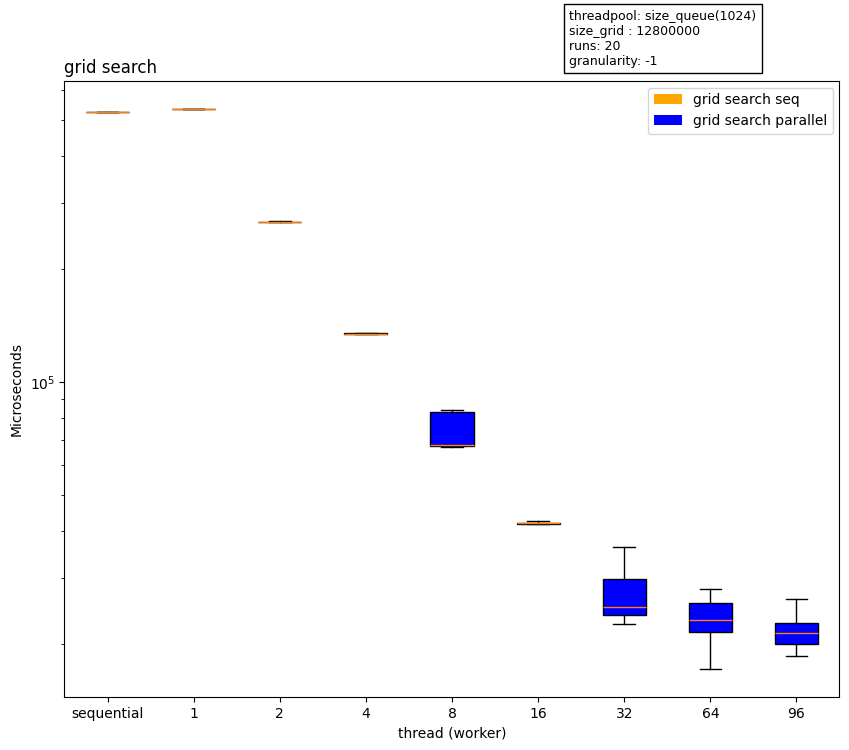

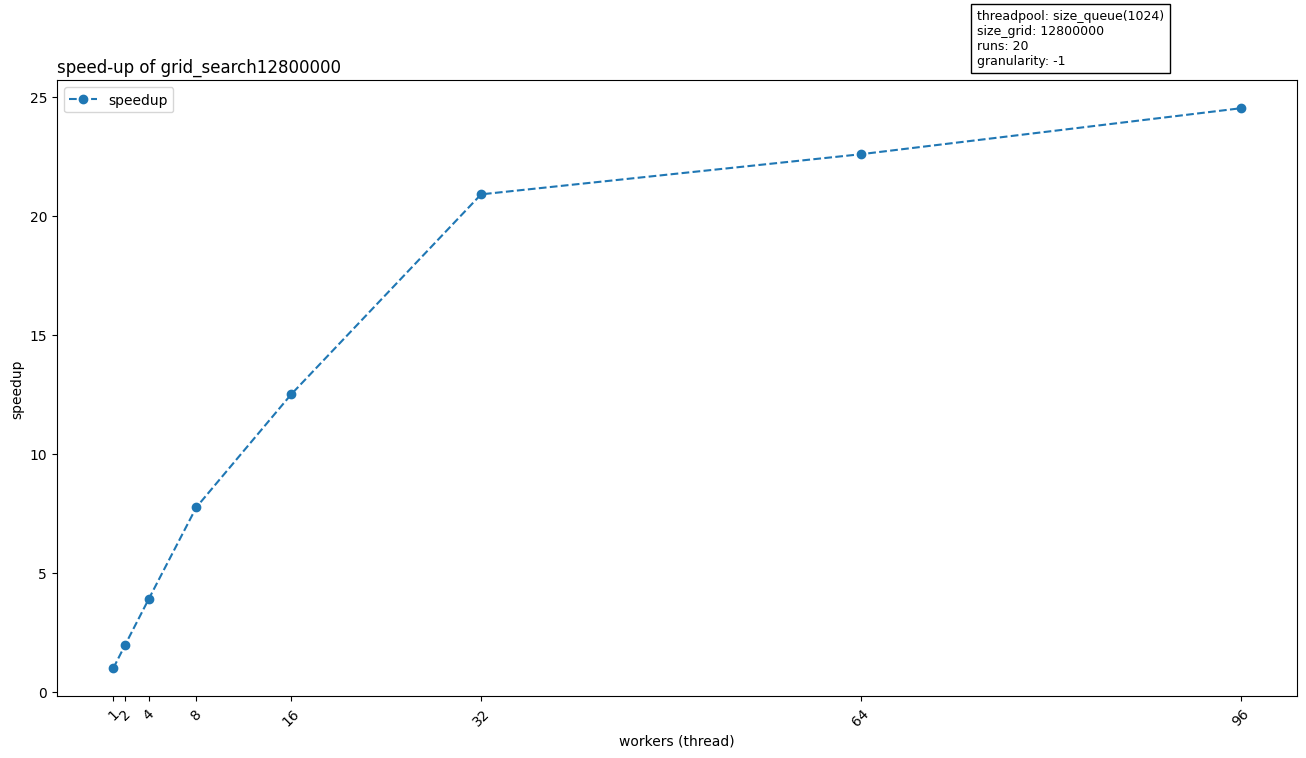

In [12]:
size_grid = 12800000  # puoi cambiare qui
dati_seq = globals()[f"grid_search_{size_grid}_seq"]
dati_parallel = []
for i in n_threads:
    dati_parallel.append(globals()[f"grid_search_{size_grid}_thread{i}"])
plot_boxplot(dati_seq, dati_parallel,"grid search",n_threads, size_grid)
data_list = []
data_list.append(dati_seq)
for i in range(len(n_threads)):
    data_list.append(dati_parallel[i])
plot_speedup(data_list,"speed-up of grid_search"+str(size_grid),n_threads)

## scalabilità debole


In [ ]:
...

## fix thread cambia granularity


In [57]:
def plot_granularity(data_for, data_par_for_n,title):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("sequential")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(granularity[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'granularity',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')

    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='for'),
        Patch(facecolor='blue', label='parallel_for')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.63, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nsize_grid : {sizegrid}\nruns: {len(data_for)}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [58]:
def plot_speedup_granularity(data_list,title,gran): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list]
    speedup = np.zeros(len(gran))


    for i in range(len(gran)):
        speedup[i] = data_median[0]/data_median[i+1]
        

    #print(data_list)
    #print(data_mean)
    gran = gran[::-1]
    speedup = speedup[::-1]
    ax.plot(gran,speedup,'o--')

    ax.legend(['speedup'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(gran)
    ax.set_xticklabels(gran, rotation = 45)


    ax.set(xlabel = 'graularity'+str(gran),ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nsize_grid: {size_grid}\nruns:{len(data_list[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Stampa degli speedup ---
    print("\n=== Speedup values ===")
    for g, s in zip(gran, speedup):
        print(f"Granularity {g}: speedup = {s:.2f}")
    print("=====================\n")

In [53]:
granularity = [1000000,100000,10000,1000] 
size_grid = 6000000
n_thread = 6
size_queue = 1024 #hardcode ma tanto qui inutile

In [21]:
#run manualmente seq,   nruns sizegrid  (for per calcolo speedup)
!./run_optimization.sh 3 6000000

In [28]:
#run manualmente parallel cambiando granularity,   nruns sizegrid n_thread granularity 
!./run_optimization_parallel_fixthread_granularity.sh 3 6000000 6 1000000 

In [65]:
dati_seq = []
dati_seq =np.genfromtxt("test_optimization_sizegrid"+str(size_grid)+".txt",delimiter=',',dtype=int)[:-1]
dati_par = []
for i,nb in enumerate(granularity):
    dati_par.append(np.genfromtxt("test_optimization_sizegrid"+str(size_grid)+"_thread"+str(n_thread)+"_granularity"+str(nb)+".txt",delimiter=',',dtype=int)[:-1])


=== Median values (µs) ===
sequential: 267298.50
1000000: 77303.00
100000: 70268.50
10000: 72489.50
1000: 80876.50



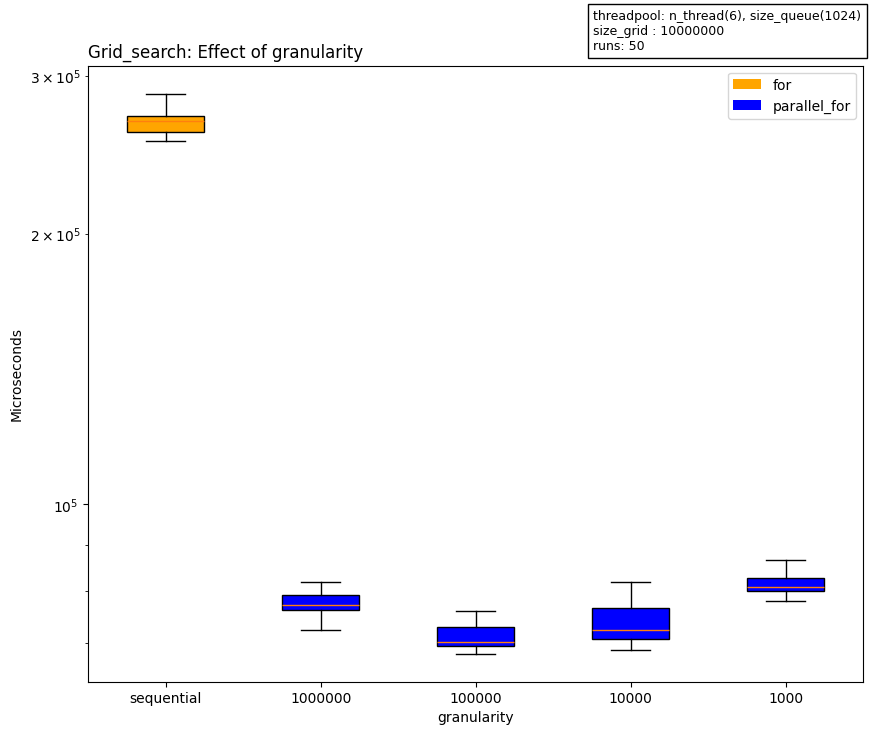

In [66]:
plot_granularity(dati_seq,dati_par,"Grid_search: Effect of granularity")


=== Speedup values ===
Granularity 1000: speedup = 3.31
Granularity 10000: speedup = 3.69
Granularity 100000: speedup = 3.80
Granularity 1000000: speedup = 3.46



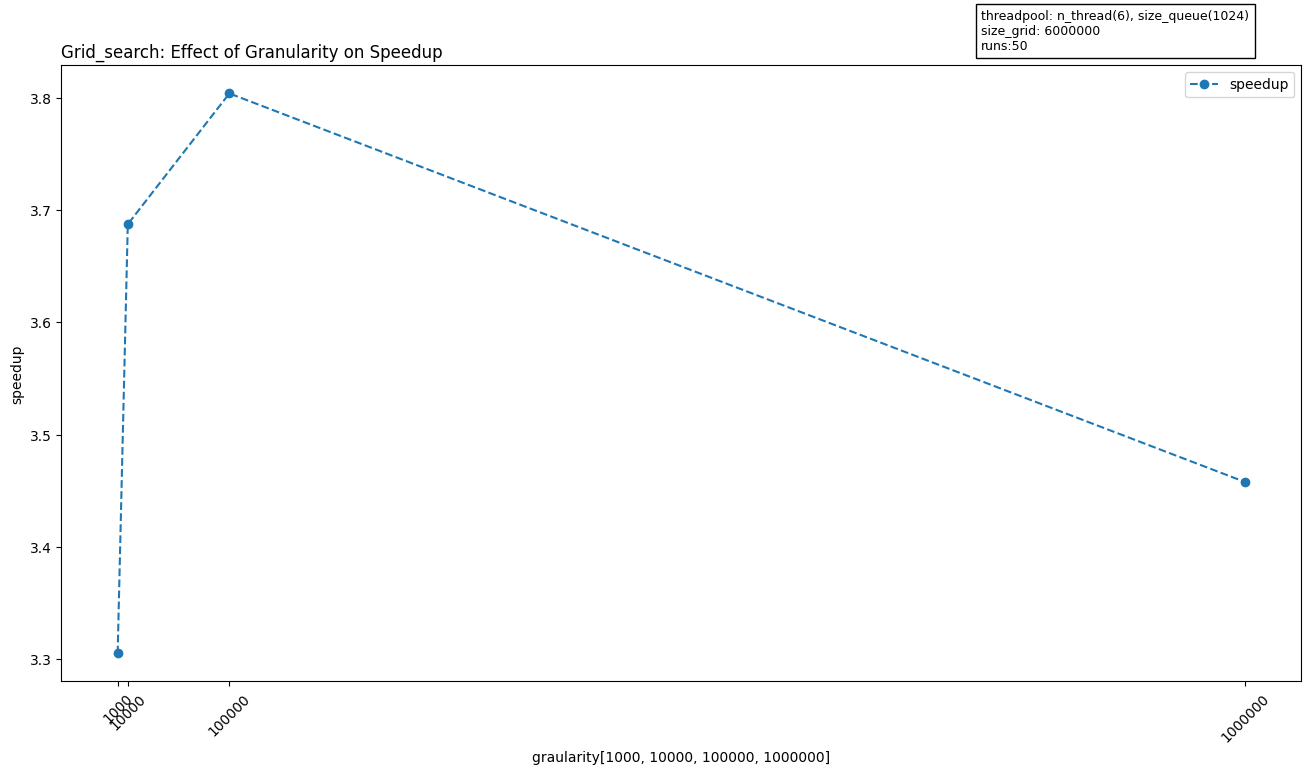

In [67]:
data_list = []
data_list.append(dati_seq)
for i,n in enumerate(granularity):
    data_list.append(dati_par[i])
plot_speedup_granularity(data_list,"Grid_search: Effect of Granularity on Speedup",granularity)